In [160]:
import os
import random

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

random_state = 42
generate_protos = True
exp_dir = '../experiments/multi_proto-cub-978eef12a5-6-00001/custom_data'
# exp_dir = '../experiments/multi_proto-cub-3ee5cbc1ab-1-00001/custom_data'
filenames = [os.path.join(exp_dir, f) for f in os.listdir(exp_dir) if f.startswith('prototypes')]
filenames = sorted(filenames)
prototypes = np.array([np.load(f) for f in filenames])
n_tasks, n_protos, n_classes, hid_dim = prototypes.shape

if generate_protos:
    n_protos = 10
    prototypes = prototypes.repeat(n_protos, axis=2)
    #prototypes = prototypes.reshape(n_tasks, n_protos, n_classes, hid_dim)
    prototypes = prototypes + np.random.randn(*prototypes.shape) * 1.0

In [161]:
prototypes = prototypes.reshape(n_tasks, n_protos * n_classes, hid_dim)
classes = np.repeat(np.arange(n_classes), n_protos)

In [162]:
TASK = 9

In [166]:
# tsne = TSNE(random_state=random_state, verbose=1)
# tsne.fit(prototypes[TASK])
# embeddings = tsne.embedding_
pca = PCA(2, random_state=random_state)
pca.fit(prototypes[TASK])
embeddings = pca.transform(prototypes[TASK])

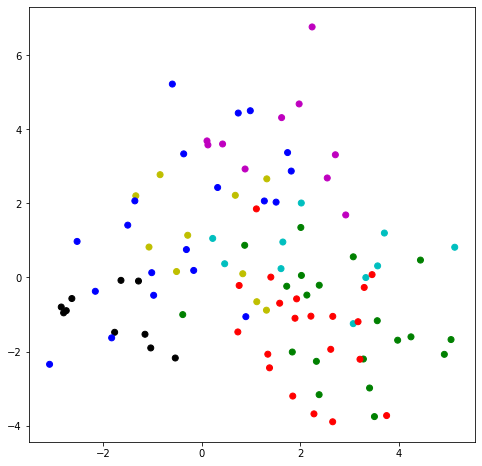

In [167]:
AVAILABLE_COLORS = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

n_classes_to_show = 10
classes_to_show = random.sample(range(n_classes), k=n_classes_to_show)
classes_to_show = set(classes_to_show)

idx = [i for i, y in enumerate(classes) if y in classes_to_show]
colors = [AVAILABLE_COLORS[list(classes_to_show).index(c) % len(AVAILABLE_COLORS)] for c in classes[idx]]

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[idx][:, 0], embeddings[idx][:, 1], c=colors)